# CASE STUDY-BANKING
## CREDIT CARD SPEND PREDICTION & IDENTIFY DRIVERS FOR SPEND

In [1]:
# Importng Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

import warnings
warnings.filterwarnings("ignore")

C:\Users\Ayush\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [2]:
from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [3]:
# Importing Data Set

credit = pd.read_excel('Data Set.xlsx')

In [4]:
credit.sample(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
162,2981-FYZXBF-DM9,5,5.0,0,22,2,December,17,4,1,...,1,1,1,1,1,0,0,0,0,0
678,1234-QJMHAW-ZVY,3,4.0,0,49,4,May,14,2,2,...,1,0,1,0,1,0,1,0,0,0
1608,1522-EVEYND-4I4,2,1.0,1,51,5,July,14,2,1,...,1,1,1,1,1,1,0,1,0,1
663,9004-UQQFLE-HQ8,1,1.0,0,31,3,September,17,4,2,...,0,0,1,0,0,0,0,0,0,0
891,8138-NYSLTE-OQN,3,3.0,1,51,5,November,12,2,1,...,1,0,0,0,0,0,1,0,0,0


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [6]:
# Importing Data Dictionary

dictionary = pd.read_excel('Data Dictionary.xlsx')

### Exploratory data analysis to identify the initial patterns in this data i.e. identification of outliers, missing values, univariate, and bivariate patterns.

In [7]:
# Extracting Categorical Variables list

cat_list = list(dictionary[-dictionary['Categorical Variable'].isnull()]['Categorical Variable'])
print(cat_list)

['region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']


In [8]:
len(cat_list)

84

In [9]:
# Create DataFrame for Categotical Variables

credit_cat = credit[cat_list]
credit_cat.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,...,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,...,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,...,1,0,1,0,1,0,0,0,1,0


In [10]:
# Create DataFrame for Numerical Variables

credit_num = credit.drop(cat_list, axis=1)
credit_num.head()

,custid,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,...,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
0,3964-QJWTRG-NPN,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,...,4.837075,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13
1,0648-AIPJSP-UVM,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,...,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18
2,5195-TLUDJE-HVO,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,...,NaN,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21
3,4459-VLPQUH-3OL,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,...,NaN,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26
4,8158-SMTQFB-CNO,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,...,NaN,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27


In [11]:
credit_num.describe()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,...,1704.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000
mean,47.025600,14.543000,54.759600,3.699909,9.954160,1.857326,-0.130454,3.654460,0.696915,6.112800,...,6.747296,15.443850,2.909733,720.478391,6.426309,10.701190,3.605001,421.984610,6.808132,19.645000
std,17.770338,3.281083,55.377511,0.747072,6.399783,3.415732,1.273058,5.395172,1.128578,7.743518,...,1.199234,15.007569,0.564859,922.225527,1.172050,19.799837,0.390102,1001.003287,1.283967,5.165609
min,18.000000,6.000000,9.000000,2.197225,0.000000,0.000000,-6.597334,0.000000,-4.092107,-1.000000,...,2.489065,0.000000,1.178655,0.000000,1.558145,0.000000,2.541602,0.000000,2.541602,0.000000
25%,31.000000,12.000000,24.000000,3.178054,5.100000,0.385520,-0.952685,0.980301,-0.018987,-1.000000,...,6.171570,0.000000,2.545531,0.000000,5.857933,0.000000,3.330417,0.000000,6.158091,17.000000
50%,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,...,7.050556,13.750000,2.904165,425.000000,6.639876,0.000000,3.597997,0.000000,7.147185,20.000000
75%,62.000000,17.000000,67.000000,4.204693,13.600000,2.063820,0.724665,4.314780,1.462053,14.000000,...,7.649835,22.750000,3.295837,1080.000000,7.218910,20.962500,3.865193,89.962500,7.755376,23.000000
max,79.000000,23.000000,1073.000000,6.978214,43.100000,109.072596,4.692014,141.459150,4.952011,24.000000,...,8.783442,188.500000,5.239098,13705.000000,9.525516,186.250000,5.227090,12858.650000,9.461772,36.000000


In [12]:
# Finding Null Values count for Numerical Variables

credit_num.isnull().sum()[credit_num.isnull().sum()>0].sort_values(ascending=False)

lnwireten      3656
lnwiremon      3656
lnequipten     3296
lnequipmon     3296
lntollten      2622
lntollmon      2622
lncardten      1422
lncardmon      1419
lnlongten         3
longten           3
cardten           2
commutetime       2
lnothdebt         1
lncreddebt        1
dtype: int64

In [13]:
# Dropping variable 'lnwireten', 'lnwiremon', 'lnequipten', 'lnequipmon', 'lntollten','lntollmon', 'lncardten', 'lncardmon' 
# as there are lots of missing values due to log transfomation (problem of ln(0)).

# Also dropping custid variable as it has no use

credit_num.drop(columns={'custid','lnwireten', 'lnwiremon', 'lnequipten', 'lnequipmon', 'lntollten','lntollmon', 'lncardten', 'lncardmon'},inplace=True)

In [14]:
# Creating new variable total_spend = 'cardspent'+'card2spent'
credit_num['total_spent'] = credit_num['cardspent']+credit_num['card2spent']
credit_num.drop(columns={'cardspent','card2spent'},inplace=True)

In [15]:
credit_num.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,total_spent
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,0.0,0.00,0.00,0.0,21.00,685.0,0.00,0.00,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,16.5,387.70,0.00,0.0,17.25,360.0,19.05,410.80,27,507.83


### Handling Missing Values

In [16]:
credit_num.isnull().sum()[credit_num.isnull().sum()>0]

lncreddebt     1
lnothdebt      1
commutetime    2
longten        3
lnlongten      3
cardten        2
dtype: int64

In [17]:
#Handling missings values 
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

In [18]:
credit_num=credit_num.apply(lambda x: Missing_imputation(x))

In [19]:
credit_num.isnull().any()

age               False
ed                False
income            False
lninc             False
debtinc           False
creddebt          False
lncreddebt        False
othdebt           False
lnothdebt         False
spoused           False
reside            False
pets              False
pets_cats         False
pets_dogs         False
pets_birds        False
pets_reptiles     False
pets_small        False
pets_saltfish     False
pets_freshfish    False
carvalue          False
commutetime       False
tenure            False
longmon           False
lnlongmon         False
longten           False
lnlongten         False
tollmon           False
tollten           False
equipmon          False
equipten          False
cardmon           False
cardten           False
wiremon           False
wireten           False
hourstv           False
total_spent       False
dtype: bool

In [20]:
# Finding Null Values count for Categorical Variables

credit_cat.isnull().sum()

region         0
townsize       2
gender         0
agecat         0
birthmonth     0
              ..
ownfax         0
news           0
response_01    0
response_02    0
response_03    0
Length: 84, dtype: int64

In [21]:
credit_cat['townsize'] = credit_cat['townsize'].replace(np.nan, credit_cat['townsize'].mode()[0])

In [22]:
credit_cat[credit_cat.townsize.isna()]

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03


In [23]:
credit_cat.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,...,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,...,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,...,1,0,1,0,1,0,0,0,1,0


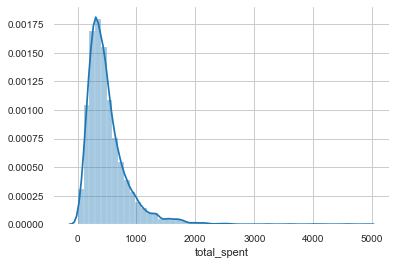

In [24]:
# Exploring data
# Distribution of variables

sns.distplot(credit_num.total_spent)

##### The plot don't seemed to be normal by histogram

In [25]:
# Taking log so that the y variable becomes normal

credit_num['total_spent_ln']= np.log(credit_num['total_spent']+1)

credit_num.drop(columns={'total_spent'},inplace=True)

Text(0.5, 1.0, 'Plot after Log transformation')

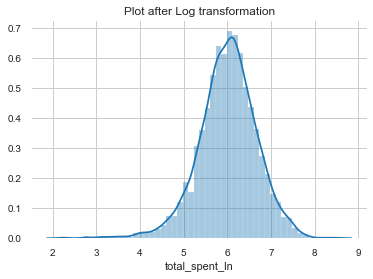

In [26]:
sns.distplot(credit_num.total_spent_ln)
plt.title('Plot after Log transformation')

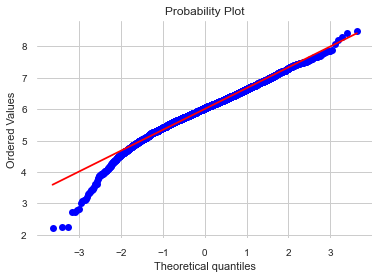

In [27]:
# To ensure price are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the price are plotted along the line.
from scipy import stats
import pylab

stats.probplot(credit_num.total_spent_ln, dist="norm", plot=pylab )
pylab.show()

#### Inference :

1. The plot seemed to be normal (bell-shaped) by histogram and majority of points are in and around the line in Q-Q plot.

In [28]:
credit_num.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,total_spent_ln
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13,5.013697
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18,4.363608
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21,5.888795
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,0.0,0.00,0.00,0.0,21.00,685.0,0.00,0.00,26,5.887242
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,16.5,387.70,0.00,0.0,17.25,360.0,19.05,410.80,27,6.232114


In [29]:
# Creating Data audit Report for numerical variable

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credit_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,0.0,2.737980e+05,54.759600,38.000000,55.377511,3.066669e+03,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,0.0,1.849955e+04,3.699909,3.637586,0.747072,5.581164e-01,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,0.0,9.286628e+03,1.857326,0.926437,3.415732,1.166722e+01,0.000000,0.033160,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
lncreddebt,5000.0,0.0,-6.522133e+02,-0.130443,-0.076106,1.272931,1.620354e+00,-6.597334,-3.401644,-2.291595,-1.737699,-0.952498,-0.076106,0.724559,1.458492,1.852071,2.658885,4.692014
othdebt,5000.0,0.0,1.827230e+04,3.654460,2.098540,5.395172,2.910788e+01,0.000000,0.114299,0.287692,0.457997,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
lnothdebt,5000.0,0.0,3.484621e+03,0.696924,0.741537,1.128466,1.273434e+00,-4.092107,-2.168235,-1.243358,-0.780244,-0.018535,0.741537,1.462046,2.087167,2.469453,3.180727,4.952011
spoused,5000.0,0.0,3.056400e+04,6.112800,-1.000000,7.743518,5.996207e+01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,24.000000


In [30]:
# Create Data audit Report for categorical variables

def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])
cat_summary=credit_cat.apply(lambda x: categorical_var_summary(x)).T
cat_summary

,N,NMISS,MODE,FREQ,PERCENT
region,5000,0,5,1027,20.54
townsize,5000,0,1,1438,28.76
gender,5000,0,1,2518,50.36
agecat,5000,0,4,1222,24.44
birthmonth,5000,0,September,458,9.16
...,...,...,...,...,...
ownfax,5000,0,0,4106,82.12
news,5000,0,0,2637,52.74
response_01,5000,0,0,4582,91.64
response_02,5000,0,0,4351,87.02


### Creating Dummy Variables

In [31]:
# Variables that needs Dummy Creation 

credit_cat1 = credit_cat.drop(columns={'employ','address','cars','cardtenure','card2tenure'})
credit_cat1.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,empcat,retire,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,1,0,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,1,0,...,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,5,0,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,1,0,...,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,0,...,1,0,1,0,1,0,0,0,1,0


In [32]:
credit_cat2 = credit_cat[['employ','address','cars','cardtenure','card2tenure']]
credit_cat2

,employ,address,cars,cardtenure,card2tenure
0,0,0,2,2,3
1,0,2,2,4,4
2,16,30,3,35,25
3,0,3,3,5,5
4,1,3,1,8,9
...,...,...,...,...,...
4995,24,24,1,35,28
4996,6,12,2,15,13
4997,24,48,3,40,29
4998,3,16,2,22,15


In [33]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [34]:
#for c_feature in categorical_features
for c_feature in credit_cat1.columns:
    credit_cat1[c_feature] = credit_cat1[c_feature].astype('category')
    credit_cat1 = create_dummies(credit_cat1 , c_feature )

In [35]:
credit_cat1.head()

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0


In [36]:
credit_cat1.dtypes

region_2         uint8
region_3         uint8
region_4         uint8
region_5         uint8
townsize_2.0     uint8
                 ...  
ownfax_1         uint8
news_1           uint8
response_01_1    uint8
response_02_1    uint8
response_03_1    uint8
Length: 171, dtype: object

In [37]:
for x in credit_cat1.columns:
    print(x)

region_2
region_3
region_4
region_5
townsize_2.0
townsize_3.0
townsize_4.0
townsize_5.0
gender_1
agecat_3
agecat_4
agecat_5
agecat_6
birthmonth_August
birthmonth_December
birthmonth_February
birthmonth_January
birthmonth_July
birthmonth_June
birthmonth_March
birthmonth_May
birthmonth_November
birthmonth_October
birthmonth_September
edcat_2
edcat_3
edcat_4
edcat_5
jobcat_2
jobcat_3
jobcat_4
jobcat_5
jobcat_6
union_1
empcat_2
empcat_3
empcat_4
empcat_5
retire_1
inccat_2
inccat_3
inccat_4
inccat_5
default_1
jobsat_2
jobsat_3
jobsat_4
jobsat_5
marital_1
spousedcat_1
spousedcat_2
spousedcat_3
spousedcat_4
spousedcat_5
homeown_1
hometype_2
hometype_3
hometype_4
addresscat_2
addresscat_3
addresscat_4
addresscat_5
carown_0
carown_1
cartype_0
cartype_1
carcatvalue_1
carcatvalue_2
carcatvalue_3
carbought_0
carbought_1
carbuy_1
commute_2
commute_3
commute_4
commute_5
commute_6
commute_7
commute_8
commute_9
commute_10
commutecat_2
commutecat_3
commutecat_4
commutecat_5
commutecar_1
commutemotorcyc

## Creating new data set with cleaned data

In [38]:
credit_new = pd.concat([credit_num,credit_cat1,credit_cat2],axis=1)

In [39]:
credit_new.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,employ,address,cars,cardtenure,card2tenure
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,0,0,0,1,0,0,0,2,2,3
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,1,1,0,0,0,0,2,2,4,4
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,0,1,0,0,0,16,30,3,35,25
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,0,1,1,0,0,0,3,3,5,5
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,0,0,0,1,0,1,3,1,8,9


In [40]:
# Renaming townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0 for various Calculations

credit_new.rename(columns={'townsize_2.0':'townsize_2','townsize_3.0':'townsize_3',
                           'townsize_4.0':'townsize_4','townsize_5.0':'townsize_5'},inplace=True)

In [41]:
### Correlation Matrix

# correlation matrix (ranges from 1 to -1)
corr = credit_new.corr()
abs(corr['total_spent_ln'].sort_values(ascending=False))

total_spent_ln    1.000000
lninc             0.403211
income            0.328543
carvalue          0.305388
lnothdebt         0.272329
                    ...   
card_3            0.107306
card_2            0.119050
carown_0          0.163277
retire_1          0.200392
carcatvalue_1     0.281309
Name: total_spent_ln, Length: 212, dtype: float64

### Feature importance from the Random Forest Model

In [42]:
#Splitting the data

feature_columns = credit_new.columns.difference(['total_spent_ln'])

In [43]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(credit_new[feature_columns],
                                                  credit_new['total_spent_ln'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_clf.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [46]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [47]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

   rank              feature  importance
0     1                lninc    0.097454
1     2               income    0.092049
2     3             carvalue    0.024861
3     4               card_3    0.022984
4     5              debtinc    0.022586
5     6          commutetime    0.021603
6     7              hourstv    0.021465
7     8              address    0.020121
8     9               card_2    0.018855
9    10               card_4    0.018038
10   11                   ed    0.017002
11   12           lncreddebt    0.016199
12   13             creddebt    0.015394
13   14              cardmon    0.015129
14   15                  age    0.014501
15   16            lnothdebt    0.014357
16   17               employ    0.013995
17   18             reason_2    0.012611
18   19                 pets    0.012412
19   20              othdebt    0.012252
20   21              tollten    0.012129
21   22              tollmon    0.011720
22   23              cardten    0.010979
23   24         

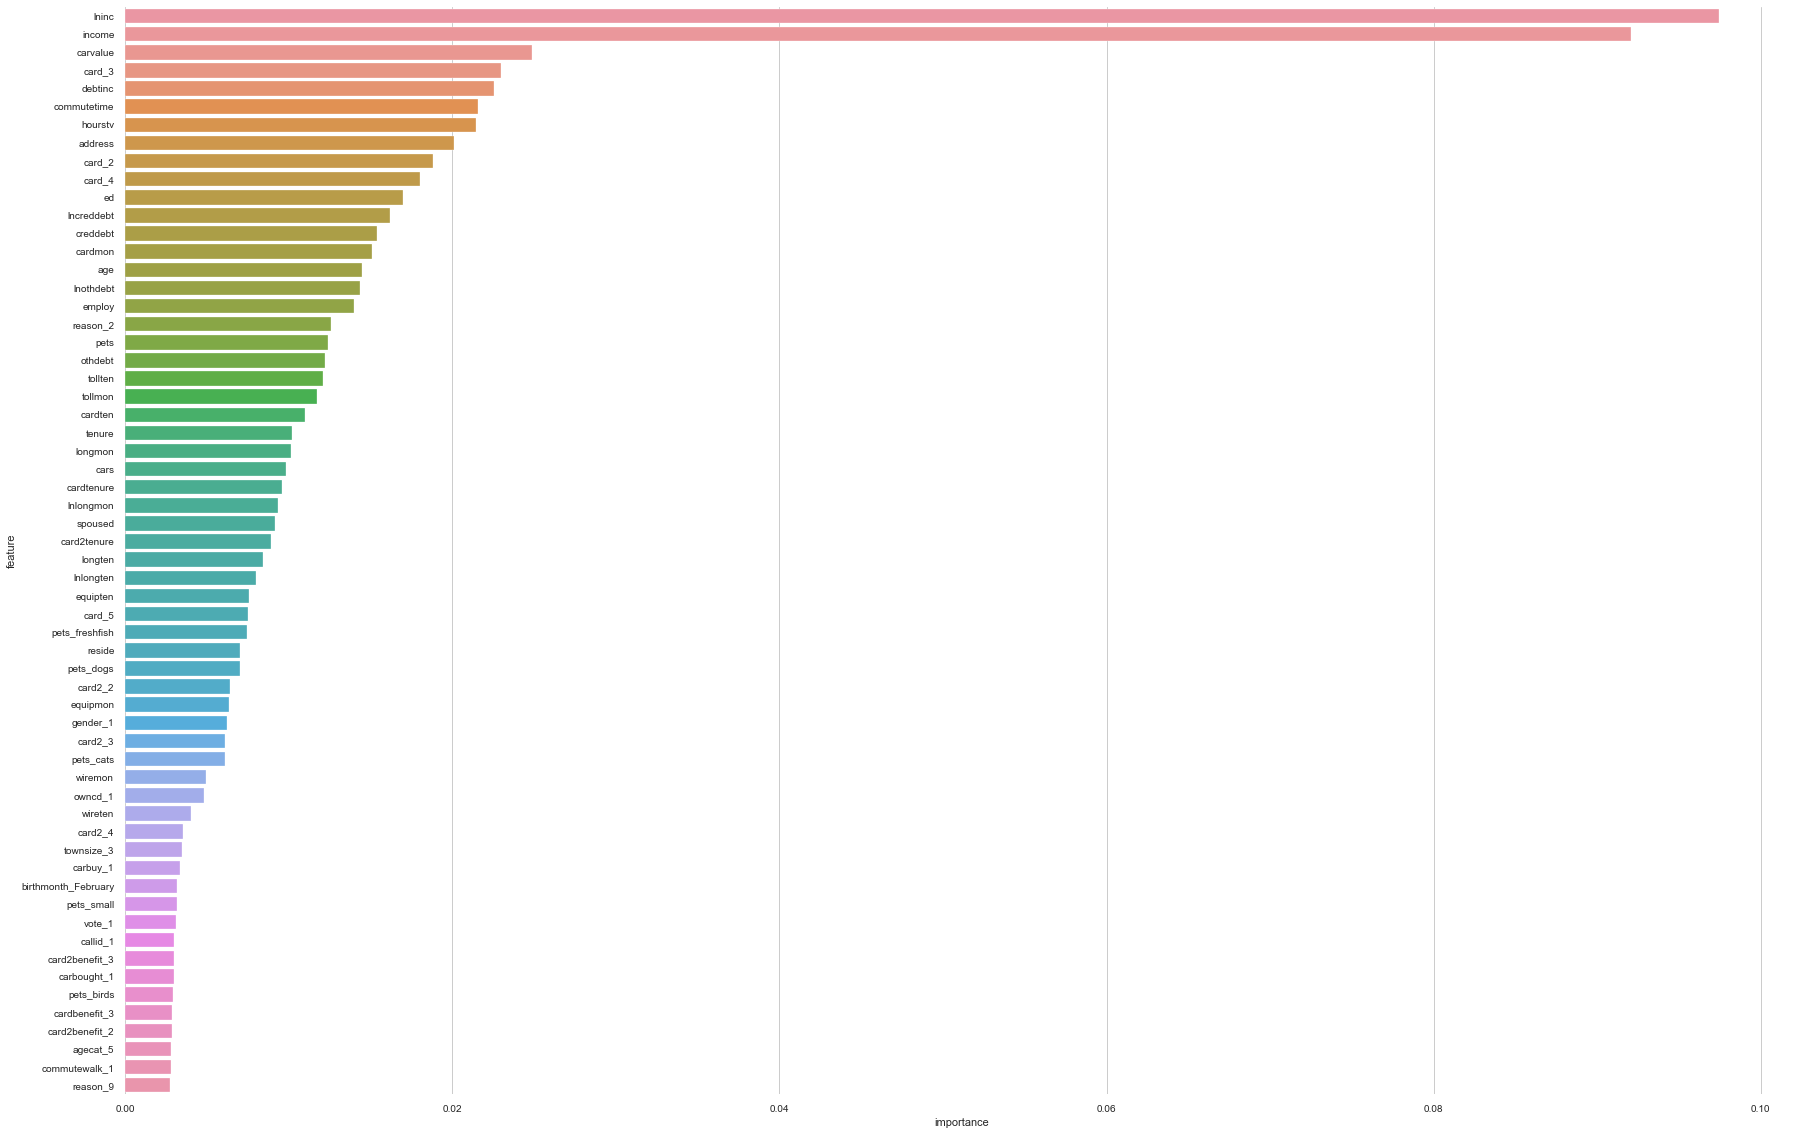

In [48]:
print(feature_rank.iloc[0:60])
plt.figure(figsize=(30,20))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank.iloc[0:60])
plt.show()

In [49]:
feature_rf = list(feature_rank.iloc[0:60]['feature'].values)
print(feature_rf)

['lninc', 'income', 'carvalue', 'card_3', 'debtinc', 'commutetime', 'hourstv', 'address', 'card_2', 'card_4', 'ed', 'lncreddebt', 'creddebt', 'cardmon', 'age', 'lnothdebt', 'employ', 'reason_2', 'pets', 'othdebt', 'tollten', 'tollmon', 'cardten', 'tenure', 'longmon', 'cars', 'cardtenure', 'lnlongmon', 'spoused', 'card2tenure', 'longten', 'lnlongten', 'equipten', 'card_5', 'pets_freshfish', 'reside', 'pets_dogs', 'card2_2', 'equipmon', 'gender_1', 'card2_3', 'pets_cats', 'wiremon', 'owncd_1', 'wireten', 'card2_4', 'townsize_3', 'carbuy_1', 'birthmonth_February', 'pets_small', 'vote_1', 'callid_1', 'card2benefit_3', 'carbought_1', 'pets_birds', 'cardbenefit_3', 'card2benefit_2', 'agecat_5', 'commutewalk_1', 'reason_9']


In [50]:
# Reatining one of the columns according the importance between pairs of these columns as these are transformation of the same columns
# ('lninc', 'income') ('lncreddebt','creddebt') ('lnothdebt', 'othdebt') ('lnlongmon','longmon') ('longten','lnlongten')

feature_remove = ['income', 'creddebt', 'othdebt','longmon', 'lnlongten']
for x in feature_remove:
    feature_rf.remove(x)

In [51]:
print(feature_rf)
print('\nNo. of features:',len(feature_rf))

['lninc', 'carvalue', 'card_3', 'debtinc', 'commutetime', 'hourstv', 'address', 'card_2', 'card_4', 'ed', 'lncreddebt', 'cardmon', 'age', 'lnothdebt', 'employ', 'reason_2', 'pets', 'tollten', 'tollmon', 'cardten', 'tenure', 'cars', 'cardtenure', 'lnlongmon', 'spoused', 'card2tenure', 'longten', 'equipten', 'card_5', 'pets_freshfish', 'reside', 'pets_dogs', 'card2_2', 'equipmon', 'gender_1', 'card2_3', 'pets_cats', 'wiremon', 'owncd_1', 'wireten', 'card2_4', 'townsize_3', 'carbuy_1', 'birthmonth_February', 'pets_small', 'vote_1', 'callid_1', 'card2benefit_3', 'carbought_1', 'pets_birds', 'cardbenefit_3', 'card2benefit_2', 'agecat_5', 'commutewalk_1', 'reason_9']

No. of features: 55


## Check Multicollinearity among independent variables. (VIF)

In [52]:
credit_new[feature_rf]

,lninc,carvalue,card_3,debtinc,commutetime,hourstv,address,card_2,card_4,ed,...,vote_1,callid_1,card2benefit_3,carbought_1,pets_birds,cardbenefit_3,card2benefit_2,agecat_5,commutewalk_1,reason_9
0,3.433987,14.3,1,11.1,22.0,13,0,0,0,15,...,1,0,0,0,0,0,0,0,1,1
1,2.708050,6.8,0,18.6,29.0,18,2,1,0,17,...,0,1,1,0,0,0,0,0,0,1
2,3.555348,18.8,0,9.9,24.0,21,30,1,0,14,...,0,0,1,0,0,0,0,0,0,0
3,2.995732,8.7,0,5.7,38.0,26,3,1,0,16,...,0,0,0,0,0,0,0,0,0,1
4,3.135494,10.6,0,1.7,32.0,27,3,0,1,16,...,0,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5.278115,64.5,0,8.0,21.0,19,24,0,0,10,...,1,0,0,0,0,1,0,0,0,1
4996,4.418841,40.0,1,15.0,26.0,14,12,0,0,14,...,0,1,0,1,0,0,1,1,0,1
4997,4.682131,53.6,0,10.8,32.0,16,48,0,0,17,...,0,1,0,1,0,0,0,0,1,1
4998,5.241747,96.0,1,10.8,12.0,24,16,0,0,19,...,0,0,0,1,0,0,0,0,0,1


In [53]:
for x in credit_new[feature_rf].columns:
    print(x,end=',')

lninc,carvalue,card_3,debtinc,commutetime,hourstv,address,card_2,card_4,ed,lncreddebt,cardmon,age,lnothdebt,employ,reason_2,pets,tollten,tollmon,cardten,tenure,cars,cardtenure,lnlongmon,spoused,card2tenure,longten,equipten,card_5,pets_freshfish,reside,pets_dogs,card2_2,equipmon,gender_1,card2_3,pets_cats,wiremon,owncd_1,wireten,card2_4,townsize_3,carbuy_1,birthmonth_February,pets_small,vote_1,callid_1,card2benefit_3,carbought_1,pets_birds,cardbenefit_3,card2benefit_2,agecat_5,commutewalk_1,reason_9,

In [54]:
import statsmodels as sm

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [56]:
#gather features feature_rf
vif1 = pd.DataFrame()
def cal_vif(f,v):
    featuresn = credit_new[f].columns
    featuresn = '+'.join(featuresn)
    featuresn = 'total_spent_ln~'+featuresn
    y, X = dmatrices(featuresn, credit_new, return_type='dataframe')
    v = pd.DataFrame()
    v['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    v['features'] = X.columns
    return v.sort_values('VIF Factor',ascending=False)

In [57]:
cal_vif(feature_rf,vif1)

,VIF Factor,features
0,311.506815,Intercept
17,36.143465,pets
30,30.430329,pets_freshfish
26,18.381632,card2tenure
23,17.436247,cardtenure
40,11.227447,wireten
38,10.973555,wiremon
21,10.669793,tenure
18,10.468268,tollten
19,9.672521,tollmon


In [58]:
def drop_var(x):
    var = x.sort_values('VIF Factor',ascending=False)[-(x.features=='Intercept')].head(1).features.values[0]
    return var

#### Removing variables till all variables' vif ~ 10 or vif >=10

In [59]:
# 1.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: pets


,VIF Factor,features
0,311.461075,Intercept
25,18.377782,card2tenure
22,17.436234,cardtenure
39,11.225717,wireten
37,10.970688,wiremon
20,10.665031,tenure
17,10.467847,tollten
18,9.672458,tollmon
19,9.663811,cardten
1,7.533793,lninc


In [60]:
# 2.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: card2tenure


,VIF Factor,features
0,311.434748,Intercept
38,11.224459,wireten
36,10.969739,wiremon
17,10.467196,tollten
22,9.991028,cardtenure
18,9.671750,tollmon
19,9.644749,cardten
20,9.122856,tenure
1,7.528021,lninc
26,7.306433,equipten


In [61]:
# 3.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: wireten


,VIF Factor,features
0,310.927546,Intercept
22,9.989166,cardtenure
19,9.534870,cardten
20,9.085725,tenure
17,8.794138,tollten
18,8.752914,tollmon
1,7.527470,lninc
12,6.549511,cardmon
14,5.613231,lnothdebt
23,5.358750,lnlongmon


#### Now all variables vif < 10. So we consider these variables for further calculations

In [63]:
vif.shape

(53, 2)

In [64]:
vif_features = vif[-(vif['features']=='Intercept')].features.values
vif_features

array(['cardtenure', 'cardten', 'tenure', 'tollten', 'tollmon', 'lninc',
       'cardmon', 'lnothdebt', 'lnlongmon', 'equipmon', 'age', 'equipten',
       'debtinc', 'longten', 'address', 'carvalue', 'lncreddebt',
       'employ', 'wiremon', 'card_4', 'card_2', 'reside', 'card_3',
       'card2_4', 'spoused', 'card2_3', 'callid_1', 'card2_2', 'ed',
       'reason_2', 'reason_9', 'card_5', 'agecat_5', 'owncd_1', 'cars',
       'carbought_1', 'card2benefit_3', 'card2benefit_2', 'carbuy_1',
       'hourstv', 'vote_1', 'commutetime', 'commutewalk_1', 'gender_1',
       'birthmonth_February', 'pets_dogs', 'pets_birds', 'townsize_3',
       'cardbenefit_3', 'pets_freshfish', 'pets_small', 'pets_cats'],
      dtype=object)

### Again finding Feature importance from the Random Forest Model

In [65]:
train_X_new = train_X[vif_features]
train_X_new.head()

,cardtenure,cardten,tenure,tollten,tollmon,lninc,cardmon,lnothdebt,lnlongmon,equipmon,...,commutewalk_1,gender_1,birthmonth_February,pets_dogs,pets_birds,townsize_3,cardbenefit_3,pets_freshfish,pets_small,pets_cats
1840,6,0.0,27,0.00,0.00,3.367296,0.00,0.505325,1.740466,0.00,...,1,1,0,2,0,0,0,0,0,0
2115,31,1560.0,59,1416.55,23.25,4.983607,28.50,1.816065,2.836150,0.00,...,0,0,0,0,0,0,0,0,0,0
4437,27,1530.0,68,2263.85,32.00,2.397895,21.25,-1.041752,2.621039,0.00,...,1,1,0,0,0,0,0,0,0,0
1146,5,0.0,12,0.00,0.00,3.850148,0.00,-0.132620,2.014903,27.55,...,0,1,0,0,0,1,0,0,0,1
2486,27,3220.0,58,1600.40,26.75,3.891820,60.25,0.362608,2.411439,0.00,...,0,1,0,0,0,0,0,3,0,0


In [66]:
radm_clf1 = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_clf1.fit( train_X_new, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [67]:
train_X_new.shape[1]

52

In [68]:
indices = np.argsort(radm_clf1.feature_importances_)[::-1]
feature_rank1 = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X_new.shape[1]):
    feature_rank1.loc[f] = [f+1,
                         train_X_new.columns[indices[f]],
                         radm_clf1.feature_importances_[indices[f]]]

   rank              feature  importance
0     1                lninc    0.198360
1     2           lncreddebt    0.044282
2     3             carvalue    0.039380
3     4            lnothdebt    0.038167
4     5              debtinc    0.034810
5     6              hourstv    0.032149
6     7          commutetime    0.031597
7     8              address    0.029079
8     9            lnlongmon    0.028024
9    10                   ed    0.027748
10   11               card_3    0.027296
11   12                  age    0.025543
12   13              cardmon    0.024963
13   14               employ    0.024080
14   15               card_2    0.023254
15   16              longten    0.023127
16   17               card_4    0.019250
17   18               tenure    0.019043
18   19              spoused    0.018655
19   20              tollmon    0.018435
20   21              cardten    0.018308
21   22              tollten    0.017960
22   23           cardtenure    0.017765
23   24         

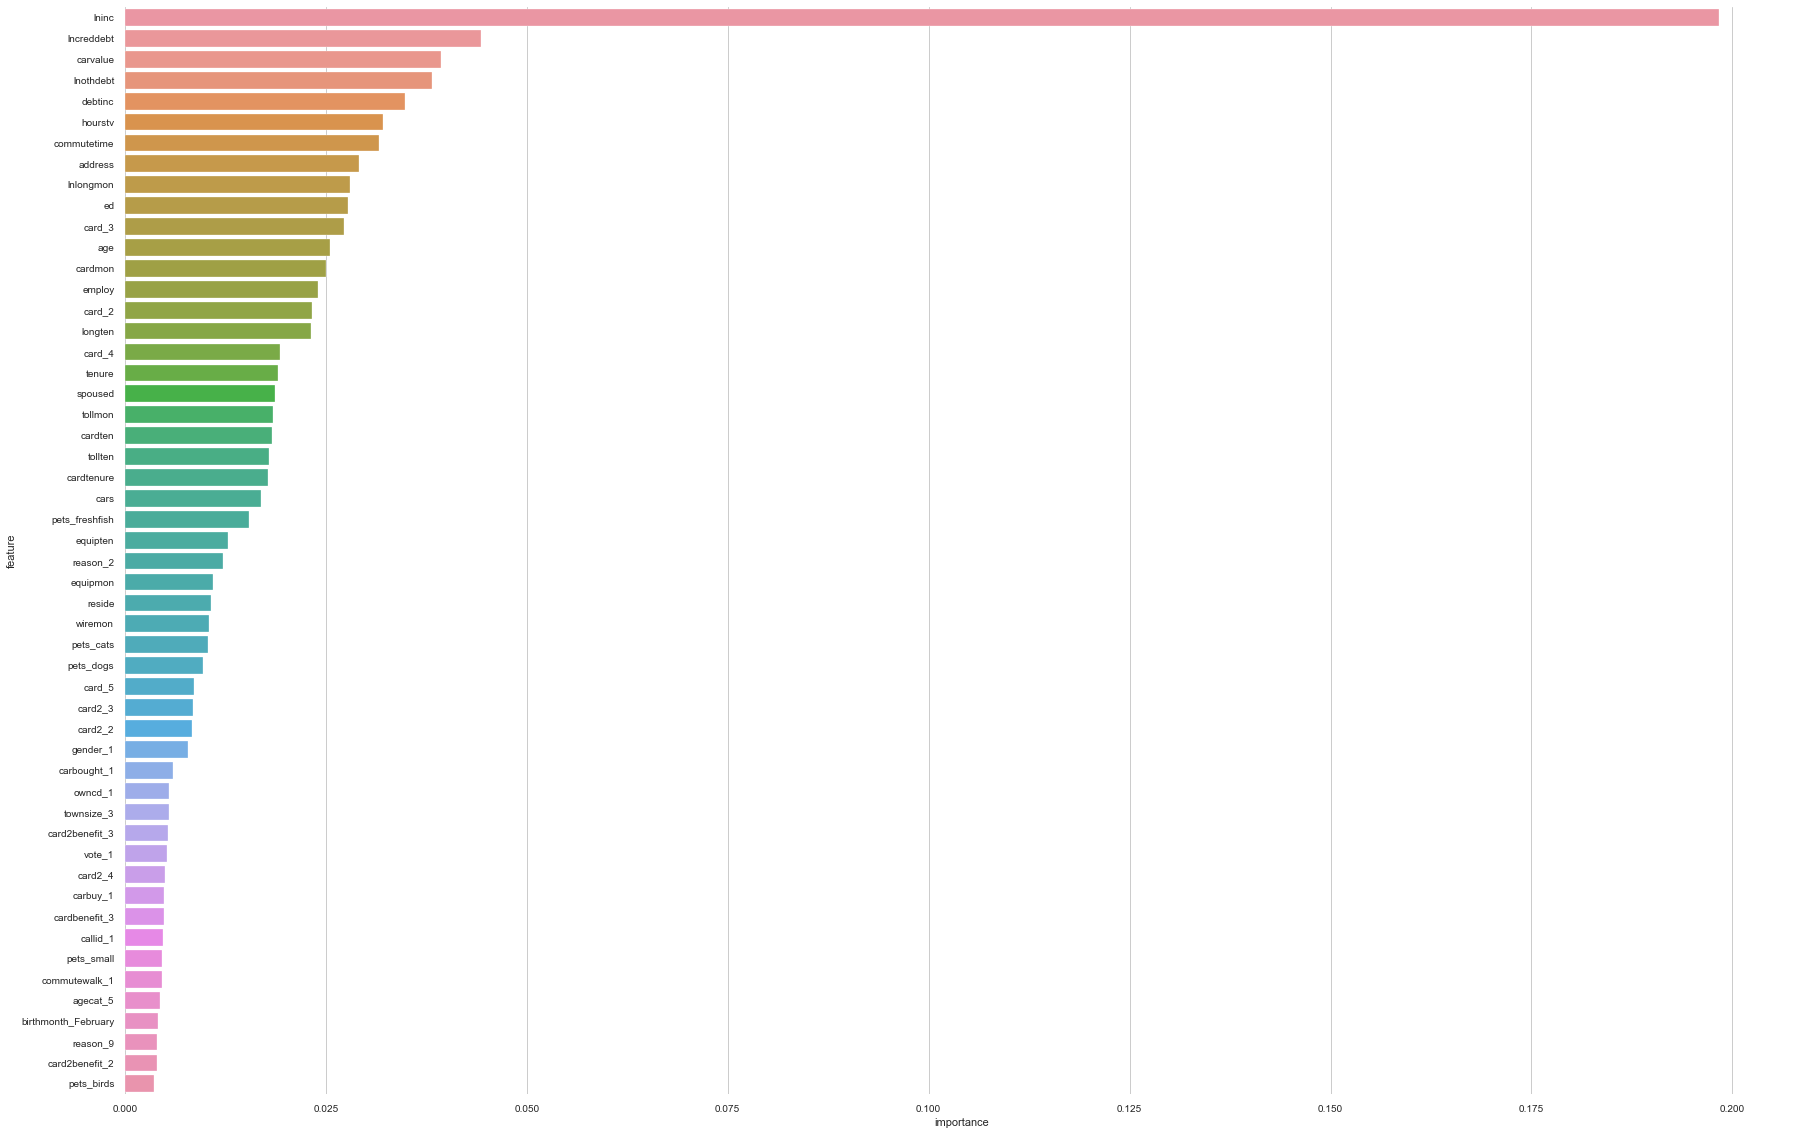

In [69]:
print(feature_rank1)
plt.figure(figsize=(30,20))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank1)
plt.show()

In [70]:
# Reataining important columns as per the Importance.

imp_features = list(feature_rank1.feature.values)
print(imp_features)

['lninc', 'lncreddebt', 'carvalue', 'lnothdebt', 'debtinc', 'hourstv', 'commutetime', 'address', 'lnlongmon', 'ed', 'card_3', 'age', 'cardmon', 'employ', 'card_2', 'longten', 'card_4', 'tenure', 'spoused', 'tollmon', 'cardten', 'tollten', 'cardtenure', 'cars', 'pets_freshfish', 'equipten', 'reason_2', 'equipmon', 'reside', 'wiremon', 'pets_cats', 'pets_dogs', 'card_5', 'card2_3', 'card2_2', 'gender_1', 'carbought_1', 'owncd_1', 'townsize_3', 'card2benefit_3', 'vote_1', 'card2_4', 'carbuy_1', 'cardbenefit_3', 'callid_1', 'pets_small', 'commutewalk_1', 'agecat_5', 'birthmonth_February', 'reason_9', 'card2benefit_2', 'pets_birds']


In [71]:
train_X_new = train_X_new[imp_features]
train_X_new.head()

,lninc,lncreddebt,carvalue,lnothdebt,debtinc,hourstv,commutetime,address,lnlongmon,ed,...,carbuy_1,cardbenefit_3,callid_1,pets_small,commutewalk_1,agecat_5,birthmonth_February,reason_9,card2benefit_2,pets_birds
1840,3.367296,-1.360720,14.2,0.505325,6.6,19,24.0,7,1.740466,16,...,1,0,0,0,1,1,0,1,0,0
2115,4.983607,1.683873,76.2,1.816065,7.9,22,27.0,17,2.836150,12,...,1,0,0,0,0,1,0,1,0,0
4437,2.397895,-1.422278,5.2,-1.041752,5.4,20,31.0,5,2.621039,11,...,0,0,1,0,1,1,0,1,0,0
1146,3.850148,-1.843883,13.8,-0.132620,2.2,21,31.0,13,2.014903,14,...,1,0,0,0,0,0,0,1,1,0
2486,3.891820,1.297170,19.8,0.362608,10.4,21,21.0,33,2.411439,17,...,0,0,1,0,0,1,0,1,0,0


## Building a linear regression model using statsmodel.api

In [72]:
import statsmodels.api as sm

### Model-1

In [73]:
train_X_new = sm.add_constant(train_X_new)
lm1=sm.OLS(train_y,train_X_new).fit()

In [74]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         total_spent_ln   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     34.59
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          7.62e-271
Time:                        02:58:59   Log-Likelihood:                -2846.4
No. Observations:                3500   AIC:                             5799.
Df Residuals:                    3447   BIC:                             6125.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.3792    

In [75]:
#Backward Elimination

# Recursively dropping variables whose p-value<5% using a function

cols = imp_features
pmax = 1
while (len(cols)>0):
    p= []
    train_X_new = train_X_new[cols]
    train_X_new = sm.add_constant(train_X_new)
    lm = sm.OLS(train_y,train_X_new).fit()
    p = pd.Series(lm.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['lninc', 'card_3', 'card_2', 'card_4', 'spoused', 'reason_2', 'reside', 'card_5', 'card2_3', 'card2_2', 'gender_1', 'card2benefit_3', 'card2_4', 'birthmonth_February', 'reason_9']


In [76]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         total_spent_ln   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     118.5
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          6.29e-298
Time:                        02:59:00   Log-Likelihood:                -2859.7
No. Observations:                3500   AIC:                             5751.
Df Residuals:                    3484   BIC:                             5850.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.3197    

#### Checking VIF once more

In [77]:
cal_vif(train_X_new.columns.drop('const'),vif1)

,VIF Factor,features
0,51.419076,Intercept
4,2.130014,card_4
3,1.934071,card_2
2,1.921056,card_3
13,1.827277,card2_4
9,1.747325,card2_3
10,1.708422,card2_2
5,1.599379,spoused
7,1.594117,reside
6,1.476055,reason_2


###  Performance check 

In [78]:
from sklearn import metrics
import numpy as np

In [79]:
train_X_new

,const,lninc,card_3,card_2,card_4,spoused,reason_2,reside,card_5,card2_3,card2_2,gender_1,card2benefit_3,card2_4,birthmonth_February,reason_9
1840,1.0,3.367296,0,1,0,15,0,5,0,0,0,1,0,0,0,1
2115,1.0,4.983607,0,0,1,-1,0,1,0,0,1,0,1,0,0,1
4437,1.0,2.397895,0,0,1,-1,0,3,0,0,0,1,1,0,0,1
1146,1.0,3.850148,1,0,0,-1,0,2,0,0,1,1,0,0,0,1
2486,1.0,3.891820,1,0,0,-1,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.0,3.610918,0,1,0,-1,0,1,0,0,0,0,0,1,0,1
466,1.0,5.826000,0,1,0,-1,0,1,0,0,0,1,1,1,0,0
3092,1.0,3.465736,1,0,0,-1,0,5,0,0,0,1,0,1,0,1
3772,1.0,3.555348,0,0,0,-1,0,1,0,1,0,1,0,0,1,1


In [80]:
# For Development Data
y_pred_dev = lm.predict(train_X_new)

print ('MAE:', metrics.mean_absolute_error(train_y, y_pred_dev))
print ('MSE:', metrics.mean_squared_error(train_y, y_pred_dev))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_dev)))
print ('MAPE:', np.mean(np.abs((train_y-y_pred_dev)/train_y))*100)

MAE: 0.4211167150839504
MSE: 0.3000668600113018
RMSE: 0.5477835886655439
MAPE: 7.423887287417992


In [81]:
# For Testing Data
test_X_new = test_X[train_X_new.columns.drop('const')]
test_X_new = sm.add_constant(test_X_new)
y_pred = lm.predict(test_X_new)

print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
print ('MAPE:', np.mean(np.abs((test_y-y_pred)/test_y))*100)

MAE: 0.4262744132187769
MSE: 0.29918380868982297
RMSE: 0.5469769727235535
MAPE: 7.431910773039552


**We can see here `MAPE` of `Train data` and `Test data` is almost similar, we can say that we have optained a `Good Model`.**  

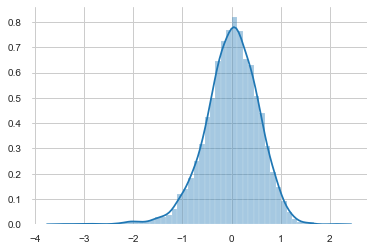

In [82]:
# Distribution of residuals
sns.distplot(lm.resid)
plt.show()

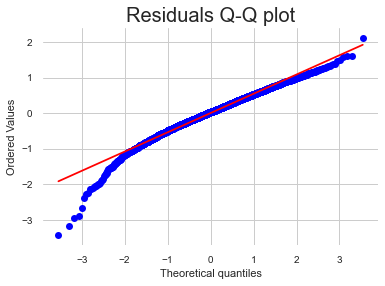

In [83]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot(lm.resid, dist="norm", plot=pylab )
plt.title('Residuals Q-Q plot',fontsize=20)
pylab.show()

#### Inference :

1. The plot seemed to be normal (bell-shaped) by histogram and majority of points are in and around the line in Q-Q plot.
2. The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

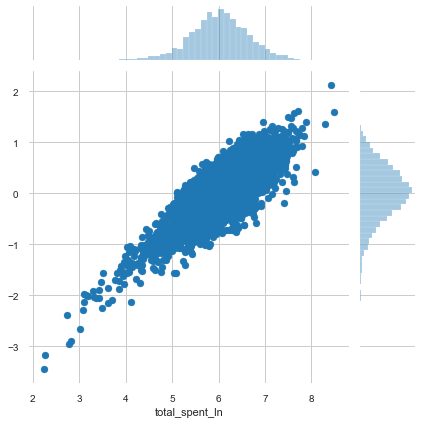

In [84]:
# Check for Heteroscedasticity

sns.jointplot(train_y,lm.resid)
plt.show()

### Inference
Since plot doesn't seems to be a funnel shape curve which indicates there is no `Heteroscedasticity`.

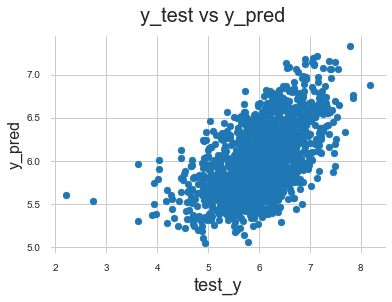

In [85]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(test_y,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('test_y', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.show()

In [86]:
test_X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1501 to 1912
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                1500 non-null   float64
 1   lninc                1500 non-null   float64
 2   card_3               1500 non-null   uint8  
 3   card_2               1500 non-null   uint8  
 4   card_4               1500 non-null   uint8  
 5   spoused              1500 non-null   int64  
 6   reason_2             1500 non-null   uint8  
 7   reside               1500 non-null   int64  
 8   card_5               1500 non-null   uint8  
 9   card2_3              1500 non-null   uint8  
 10  card2_2              1500 non-null   uint8  
 11  gender_1             1500 non-null   uint8  
 12  card2benefit_3       1500 non-null   uint8  
 13  card2_4              1500 non-null   uint8  
 14  birthmonth_February  1500 non-null   uint8  
 15  reason_9             1500 non-null 

In [87]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         total_spent_ln   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     118.5
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          6.29e-298
Time:                        02:59:03   Log-Likelihood:                -2859.7
No. Observations:                3500   AIC:                             5751.
Df Residuals:                    3484   BIC:                             5850.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.3197    

## Drivers for Total Spend

In [88]:
print(lm.params.index.values)

['const' 'lninc' 'card_3' 'card_2' 'card_4' 'spoused' 'reason_2' 'reside'
 'card_5' 'card2_3' 'card2_2' 'gender_1' 'card2benefit_3' 'card2_4'
 'birthmonth_February' 'reason_9']


In [89]:
# Drivers and their corresponding beta values

lm.params

const                  5.319697
lninc                  0.360457
card_3                -0.613698
card_2                -0.614903
card_4                -0.692405
spoused               -0.003695
reason_2               0.377638
reside                 0.021617
card_5                -0.477429
card2_3               -0.309482
card2_2               -0.323352
gender_1              -0.062980
card2benefit_3        -0.058959
card2_4               -0.360940
birthmonth_February   -0.070397
reason_9               0.136686
dtype: float64

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.338 and 0.335 - `33.8%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 118.5 and 6.29e-298(approx. 0.0) - Model fit is significant and explained `33.8%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.
4. `Durbin-Watson` is 2.041 which is close to ~2 which indicates there is no Auto- correlation between residuals.
5. `VIF` of all the variables is less than `10` which indicates there is no significant Multicollinearity.